# Import The Libraries

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten , Activation

# Rearrange the data creating our train and test arrays

In [ ]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images=train_images1[:5000,:]
# train_labels=train_labels1[:5000]
# test_images=test_images1[:500,:]
# test_labels=test_labels1[:500]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#function to make the labeles as one hot vector
def label_reshape(arr_labele):
    label_vector=[]
    for i in range(len(arr_labele)):
        label_vector.append([0 for _ in range(10)])
        x = arr_labele[i]
        label_vector[i][x] = 1
    return label_vector  

In [ ]:
train_labels = label_reshape(train_labels)
test_labels = label_reshape(test_labels)

In [ ]:
train_labels[5]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#checking the arrays
train_images.shape , type(train_images) , test_images.shape , type(test_images)

((60000, 28, 28), numpy.ndarray, (10000, 28, 28), numpy.ndarray)

# Plotting numbers

In [ ]:
#function to plot the number
def plot_img(mnist_index):
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

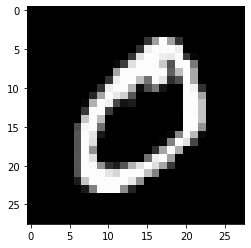

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#test the function
plot_img(train_images[1])
train_labels[1]

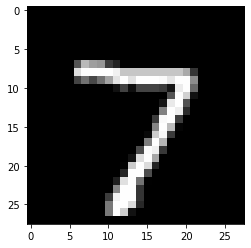

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
#test function
plot_img(test_images[0])
test_labels[0]

#Normalize the Data and Resahpe the img

In [ ]:
train_images = tf.keras.utils.normalize(train_images,axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)

#Resahpe the images to make it suitable

In [ ]:
#function to reshape
def reshape_img(img):
  img_size = img.shape[1]
  img = img.reshape(-1,img_size,img_size,1)
  return img

In [ ]:
#increase 1 dim for filter operation
train_images = reshape_img(np.array(train_images))
test_images = reshape_img(np.array(test_images))

print(train_images.shape,test_images.shape)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# **Creat our CNN**




##Model 1

In [ ]:
#creat the model
model_1 = Sequential()

#conv layers

##first CNN layer
model_1.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_1.add(Activation("relu"))

##second CNN layer
model_1.add(Conv2D(32,(2,2)))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())

#FC layers

##first FC layer
model_1.add(Dense(32))
model_1.add(Activation("relu"))

##second FC layer
model_1.add(Dense(16))
model_1.add(Activation("relu"))

# softmax classifier
model_1.add(Dense(10))
model_1.add(Activation("softmax"))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 16)        80        
                                                                 
 activation (Activation)     (None, 27, 27, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                        

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_1.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7628 - accuracy: 0.7695
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2818 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2214 - accuracy: 0.9326
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1895 - accuracy: 0.9430
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1672 - accuracy: 0.9488
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1517 - accuracy: 0.9541
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1384 - accuracy: 0.9580
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1256 - accuracy: 0.9617
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1166 - accuracy: 0.9640
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_1.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1097 - accuracy: 0.9670
loss = 0.10971850901842117
accuracy = 0.9670000076293945


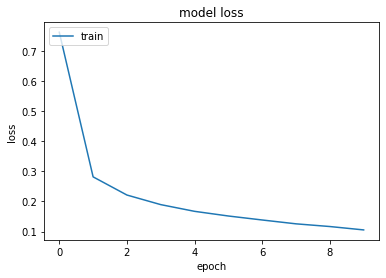

In [ ]:
def plot_losses(h):  
    plt.plot(h.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

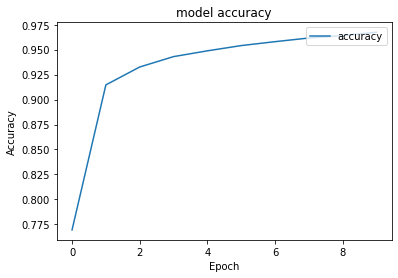

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 2

In [ ]:
#creat the model
model_2 = Sequential()

#conv layers

##first CNN layer
model_2.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_2.add(Activation("relu"))

##second CNN layer
model_2.add(Conv2D(32,(2,2)))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())

#FC layers

##first FC layer
model_2.add(Dense(32))
model_2.add(Activation("relu"))

##second FC layer
model_2.add(Dense(16))
model_2.add(Activation("relu"))

# softmax classifier
model_2.add(Dense(10))
model_2.add(Activation("softmax"))

model_2.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_188 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_82 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_189 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_36 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_2.fit(train_images,train_labels,epochs=12,batch_size=32)

Epoch 1/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8106 - accuracy: 0.7530
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2629 - accuracy: 0.9198
Epoch 3/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2052 - accuracy: 0.9366
Epoch 4/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1752 - accuracy: 0.9450
Epoch 5/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1579 - accuracy: 0.9507
Epoch 6/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1450 - accuracy: 0.9553
Epoch 7/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1337 - accuracy: 0.9585
Epoch 8/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1259 - accuracy: 0.9612
Epoch 9/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1175 - accuracy: 0.9634
Epoch 10/12
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_2.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1172 - accuracy: 0.9635
loss = 0.11717939376831055
accuracy = 0.9635000228881836


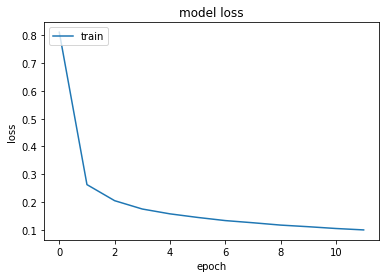

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

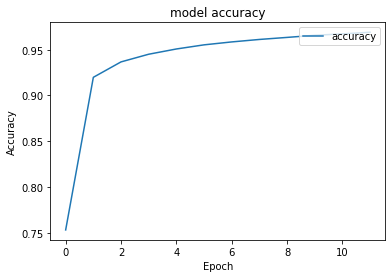

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 3

In [ ]:
#creat the model
model_3 = Sequential()

#conv layers

##first CNN layer
model_3.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_3.add(Activation("relu"))

##second CNN layer
model_3.add(Conv2D(32,(2,2)))
model_3.add(Activation("relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())

#FC layers

##first FC layer
model_3.add(Dense(32))
model_3.add(Activation("relu"))

##second FC layer
model_3.add(Dense(16))
model_3.add(Activation("relu"))

# softmax classifier
model_3.add(Dense(10))
model_3.add(Activation("softmax"))

model_3.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_193 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_84 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_194 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_37 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_3.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8412 - accuracy: 0.7480
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2549 - accuracy: 0.9244
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1998 - accuracy: 0.9394
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1703 - accuracy: 0.9484
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1523 - accuracy: 0.9542
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1372 - accuracy: 0.9578
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1284 - accuracy: 0.9600
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1186 - accuracy: 0.9634
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1124 - accuracy: 0.9649
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_3.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9709
loss = 0.09667312353849411
accuracy = 0.9708999991416931


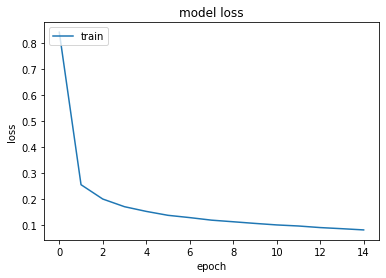

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

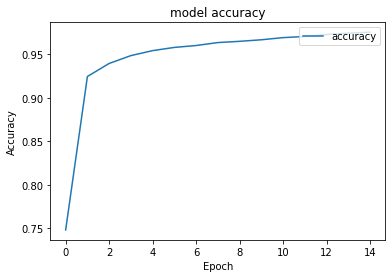

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 4

In [ ]:
#creat the model
model_4 = Sequential()

#conv layers

##first CNN layer
model_4.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_4.add(Activation("relu"))

##second CNN layer
model_4.add(Conv2D(32,(2,2)))
model_4.add(Activation("relu"))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())

#FC layers

##first FC layer
model_4.add(Dense(32))
model_4.add(Activation("relu"))

##second FC layer
model_4.add(Dense(16))
model_4.add(Activation("relu"))

# softmax classifier
model_4.add(Dense(10))
model_4.add(Activation("softmax"))

model_4.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_198 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_199 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_38 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_4.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4804 - accuracy: 0.8480
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1806 - accuracy: 0.9449
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1193 - accuracy: 0.9630
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0845 - accuracy: 0.9737
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0648 - accuracy: 0.9800
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 7/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0423 - accuracy: 0.9869
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 9/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
loss, acc =model_4.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0908 - accuracy: 0.9788
loss = 0.09084996581077576
accuracy = 0.9787999987602234


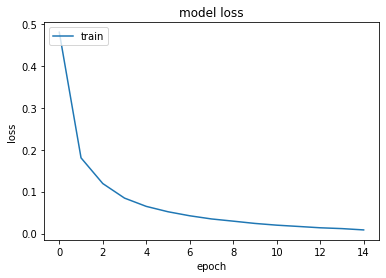

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

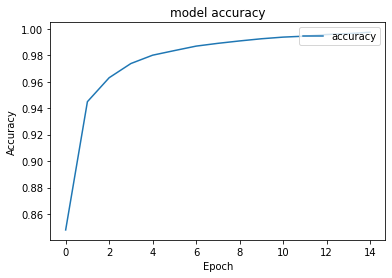

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 5

In [ ]:
#creat the model
model_5 = Sequential()

#conv layers

##first CNN layer
model_5.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_5.add(Activation("relu"))

##second CNN layer
model_5.add(Conv2D(32,(2,2)))
model_5.add(Activation("relu"))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Flatten())

#FC layers

##first FC layer
model_5.add(Dense(32))
model_5.add(Activation("relu"))

##second FC layer
model_5.add(Dense(16))
model_5.add(Activation("relu"))

# softmax classifier
model_5.add(Dense(10))
model_5.add(Activation("softmax"))

model_5.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_203 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_88 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_204 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_39 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
model_5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.08), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_5.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4075 - accuracy: 0.8709
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1466 - accuracy: 0.9548
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0904 - accuracy: 0.9722
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0390 - accuracy: 0.9877
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0256 - accuracy: 0.9915
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_5.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0734 - accuracy: 0.9849
loss = 0.07336077839136124
accuracy = 0.9848999977111816


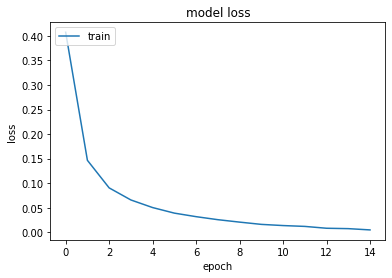

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

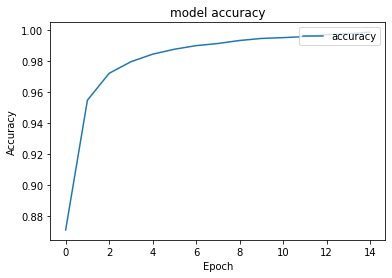

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 6

In [ ]:
#creat the model
model_6 = Sequential()

#conv layers

##first CNN layer
model_6.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_6.add(Activation("relu"))

##second CNN layer
model_6.add(Conv2D(32,(2,2)))
model_6.add(Activation("relu"))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

model_6.add(Flatten())

#FC layers

##first FC layer
model_6.add(Dense(32))
model_6.add(Activation("relu"))

##second FC layer
model_6.add(Dense(16))
model_6.add(Activation("relu"))

# softmax classifier
model_6.add(Dense(10))
model_6.add(Activation("softmax"))

model_6.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_208 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_90 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_209 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_40 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
model_6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_6.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5340 - accuracy: 0.8350
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1987 - accuracy: 0.9380
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1496 - accuracy: 0.9539
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1163 - accuracy: 0.9638
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0920 - accuracy: 0.9714
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0733 - accuracy: 0.9781
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0600 - accuracy: 0.9816
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 9/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0418 - accuracy: 0.9872
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
loss, acc =model_6.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0681 - accuracy: 0.9813
loss = 0.06812634319067001
accuracy = 0.9812999963760376


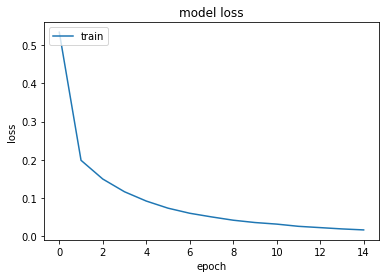

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

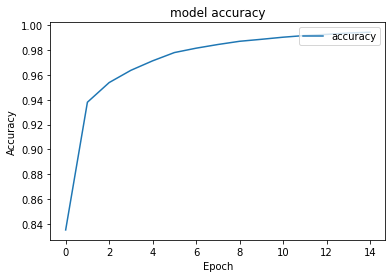

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 7

In [ ]:
#creat the model
model_7 = Sequential()

#conv layers

##first CNN layer
model_7.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_7.add(Activation("relu"))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

model_7.add(Flatten())

#FC layers

##first FC layer
model_7.add(Dense(16))
model_7.add(Activation("relu"))

# softmax classifier
model_7.add(Dense(10))
model_7.add(Activation("softmax"))

model_7.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_213 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 2704)              0         
                                                                 
 dense_122 (Dense)           (None, 16)                43280     
                                                                 
 activation_214 (Activation)  (None, 16)               0         
                                                     

In [ ]:
model_7.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_7.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4574 - accuracy: 0.8652
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2642 - accuracy: 0.9205
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2322 - accuracy: 0.9305
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2112 - accuracy: 0.9362
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1944 - accuracy: 0.9404
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1776 - accuracy: 0.9460
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1612 - accuracy: 0.9507
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1447 - accuracy: 0.9557
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1282 - accuracy: 0.9610
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.113

In [ ]:
loss, acc =model_7.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1078 - accuracy: 0.9674
loss = 0.10780709236860275
accuracy = 0.9674000144004822


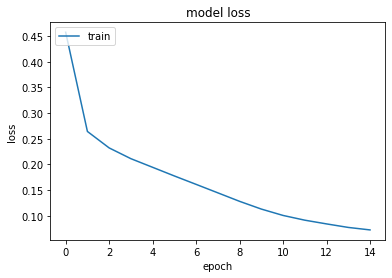

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

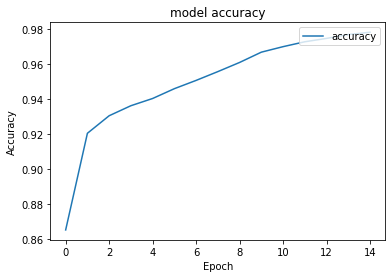

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 8

In [ ]:
#creat the model
model_8 = Sequential()

#conv layers

##first CNN layer
model_8.add(Conv2D(32,(2,2),input_shape = train_images.shape[1:]))
model_8.add(Activation("relu"))
model_8.add(MaxPooling2D(pool_size=(2, 2)))

model_8.add(Flatten())

#FC layers

##first FC layer
model_8.add(Dense(32))
model_8.add(Activation("relu"))

##second FC layer
model_8.add(Dense(16))
model_8.add(Activation("relu"))

# softmax classifier
model_8.add(Dense(10))
model_8.add(Activation("softmax"))

model_8.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 activation_216 (Activation)  (None, 27, 27, 32)       0         
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 5408)              0         
                                                                 
 dense_124 (Dense)           (None, 32)                173088    
                                                                 
 activation_217 (Activation)  (None, 32)               0         
                                                     

In [ ]:
model_8.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_8.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4389 - accuracy: 0.8657
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2014 - accuracy: 0.9376
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1623 - accuracy: 0.9505
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1390 - accuracy: 0.9577
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1187 - accuracy: 0.9640
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1052 - accuracy: 0.9674
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0921 - accuracy: 0.9716
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0796 - accuracy: 0.9752
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0709 - accuracy: 0.9780
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.061

In [ ]:
loss, acc =model_8.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0796 - accuracy: 0.9762
loss = 0.07955747097730637
accuracy = 0.9761999845504761


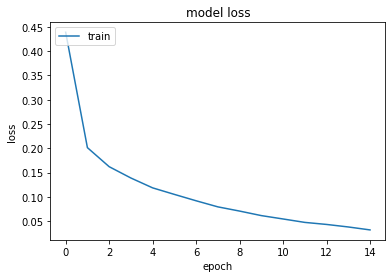

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

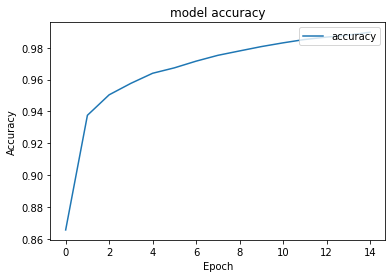

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 9

In [ ]:
#creat the model
model_9 = Sequential()

#conv layers

##first CNN layer
model_9.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_9.add(Activation("relu"))

##second CNN layer
model_9.add(Conv2D(32,(2,2)))
model_9.add(Activation("relu"))
model_9.add(MaxPooling2D(pool_size=(2, 2)))

model_9.add(Flatten())

#FC layers

##first FC layer
model_9.add(Dense(32))
model_9.add(Activation("relu"))

# softmax classifier
model_9.add(Dense(10))
model_9.add(Activation("softmax"))

model_9.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_220 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_94 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_221 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_43 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
model_9.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_9.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3562 - accuracy: 0.8918
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1736 - accuracy: 0.9464
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1252 - accuracy: 0.9616
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0929 - accuracy: 0.9718
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0741 - accuracy: 0.9773
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0605 - accuracy: 0.9809
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0506 - accuracy: 0.9843
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0362 - accuracy: 0.9883
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_9.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9805
loss = 0.07571687549352646
accuracy = 0.9804999828338623


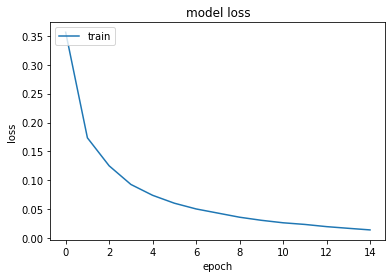

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

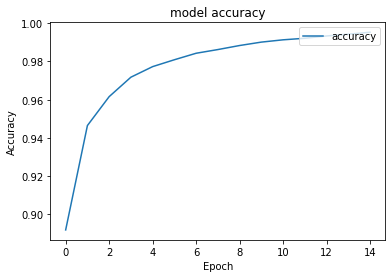

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 10

In [ ]:
#creat the model
model_10 = Sequential()

#conv layers

##first CNN layer
model_10.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_10.add(Activation("relu"))

##second CNN layer
model_10.add(Conv2D(32,(2,2)))
model_10.add(Activation("relu"))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_10.add(Conv2D(64,(2,2)))
model_10.add(Activation("relu"))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

model_10.add(Flatten())

#FC layers

##first FC layer
model_10.add(Dense(64))
model_10.add(Activation("relu"))

##second FC layer
model_10.add(Dense(32))
model_10.add(Activation("relu"))

# softmax classifier
model_10.add(Dense(10))
model_10.add(Activation("softmax"))

model_10.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_224 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_96 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_225 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_10.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_10.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3986 - accuracy: 0.8713
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1023 - accuracy: 0.9682
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0725 - accuracy: 0.9773
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0560 - accuracy: 0.9822
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0464 - accuracy: 0.9852
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 8/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0253 - accuracy: 0.9918
Epoch 9/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 10/15
1875/1875 [==============================] - 13s 7ms/step - l

In [ ]:
loss, acc =model_10.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9874
loss = 0.05020773783326149
accuracy = 0.9873999953269958


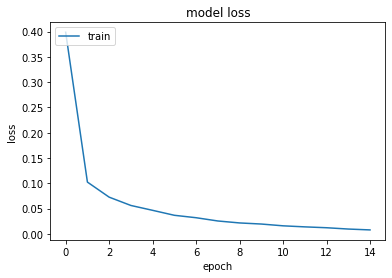

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

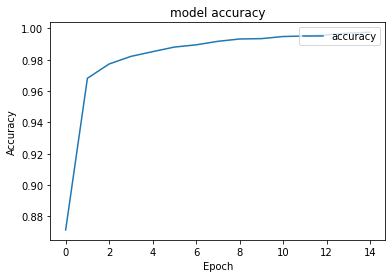

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 11

In [ ]:
#creat the model
model_11 = Sequential()

#conv layers

##first CNN layer
model_11.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_11.add(Activation("relu"))

##second CNN layer
model_11.add(Conv2D(32,(2,2)))
model_11.add(Activation("relu"))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_11.add(Conv2D(64,(2,2)))
model_11.add(Activation("relu"))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

model_11.add(Flatten())

#FC layers

##first FC layer
model_11.add(Dense(64))
model_11.add(Activation("relu"))

##second FC layer
model_11.add(Dense(32))
model_11.add(Activation("relu"))

##third FC layer
model_11.add(Dense(16))
model_11.add(Activation("relu"))

# softmax classifier
model_11.add(Dense(10))
model_11.add(Activation("softmax"))

model_11.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_230 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_99 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_231 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_11.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_11.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5217 - accuracy: 0.8280
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1058 - accuracy: 0.9671
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0697 - accuracy: 0.9780
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0532 - accuracy: 0.9840
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0417 - accuracy: 0.9868
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 8/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 9/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 10/15
1875/1875 [==============================] - 13s 7ms/step - l

In [ ]:
loss, acc =model_11.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0588 - accuracy: 0.9843
loss = 0.05881759524345398
accuracy = 0.9843000173568726


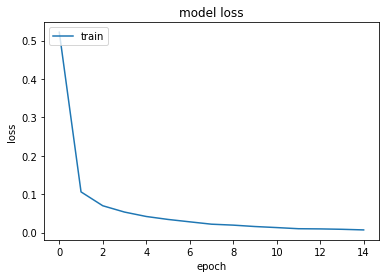

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

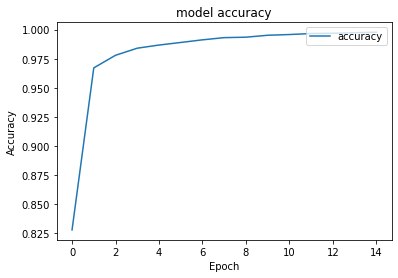

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 12

In [ ]:
#creat the model
model_12 = Sequential()

#conv layers

##first CNN layer
model_12.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_12.add(Activation("relu"))

##second CNN layer
model_12.add(Conv2D(32,(2,2)))
model_12.add(Activation("relu"))
model_12.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_12.add(Conv2D(64,(2,2)))
model_12.add(Activation("relu"))
model_12.add(MaxPooling2D(pool_size=(2, 2)))

model_12.add(Flatten())

#FC layers

##first FC layer
model_12.add(Dense(64))
model_12.add(Activation("relu"))

##second FC layer
model_12.add(Dense(32))
model_12.add(Activation("relu"))

# softmax classifier
model_12.add(Dense(10))
model_12.add(Activation("softmax"))

model_12.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_237 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_102 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_238 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_12.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_12.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.3152 - accuracy: 0.8988
Epoch 2/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0868 - accuracy: 0.9729
Epoch 3/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0588 - accuracy: 0.9811
Epoch 4/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0446 - accuracy: 0.9862
Epoch 5/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0353 - accuracy: 0.9888
Epoch 6/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 7/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 8/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 9/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 10/15
3000/3000 [==============================] - 17s 6ms/step - l

In [ ]:
loss, acc =model_12.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0680 - accuracy: 0.9853
loss = 0.06801404058933258
accuracy = 0.9853000044822693


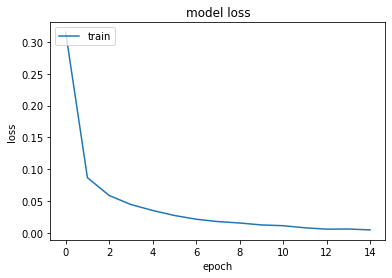

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

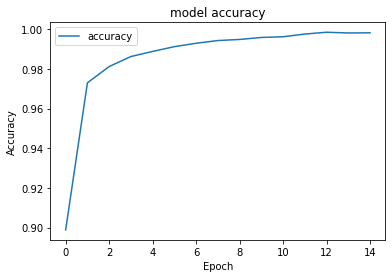

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 13

In [ ]:
#creat the model
model_13 = Sequential()

#conv layers

##first CNN layer
model_13.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_13.add(Activation("relu"))

##second CNN layer
model_13.add(Conv2D(32,(2,2)))
model_13.add(Activation("relu"))
model_13.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_13.add(Conv2D(64,(2,2)))
model_13.add(Activation("relu"))
model_13.add(MaxPooling2D(pool_size=(2, 2)))

model_13.add(Flatten())

#FC layers

##first FC layer
model_13.add(Dense(64))
model_13.add(Activation("relu"))

##second FC layer
model_13.add(Dense(32))
model_13.add(Activation("relu"))

# softmax classifier
model_13.add(Dense(10))
model_13.add(Activation("softmax"))

model_13.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_243 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_105 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_244 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_13.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_13.fit(train_images,train_labels,epochs=15,batch_size=64)

Epoch 1/15
938/938 [==============================] - 9s 8ms/step - loss: 0.6251 - accuracy: 0.7995
Epoch 2/15
938/938 [==============================] - 8s 8ms/step - loss: 0.1264 - accuracy: 0.9604
Epoch 3/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0887 - accuracy: 0.9726
Epoch 4/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0711 - accuracy: 0.9779
Epoch 5/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0606 - accuracy: 0.9810
Epoch 6/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0515 - accuracy: 0.9833
Epoch 7/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0448 - accuracy: 0.9856
Epoch 8/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 9/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 10/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0311 - accuracy: 0.9898

In [ ]:
loss, acc =model_13.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0585 - accuracy: 0.9830
loss = 0.05848000943660736
accuracy = 0.9829999804496765


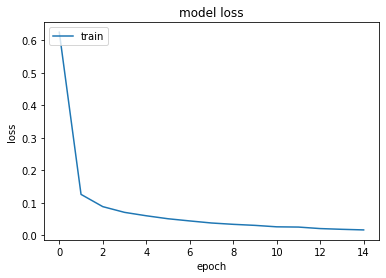

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

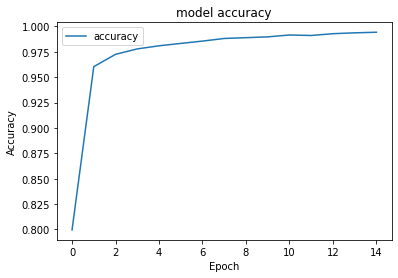

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 14

In [ ]:
#creat the model
model_14 = Sequential()

#conv layers

##first CNN layer
model_14.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_14.add(Activation("sigmoid"))

##second CNN layer
model_14.add(Conv2D(32,(2,2)))
model_14.add(Activation("sigmoid"))
model_14.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_14.add(Conv2D(64,(2,2)))
model_14.add(Activation("sigmoid"))
model_14.add(MaxPooling2D(pool_size=(2, 2)))

model_14.add(Flatten())

#FC layers

##first FC layer
model_14.add(Dense(64))
model_14.add(Activation("sigmoid"))

##second FC layer
model_14.add(Dense(32))
model_14.add(Activation("sigmoid"))

# softmax classifier
model_14.add(Dense(10))
model_14.add(Activation("softmax"))

model_14.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_249 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_108 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_250 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_14.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_14.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3072 - accuracy: 0.1041
Epoch 2/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3045 - accuracy: 0.1076
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3035 - accuracy: 0.1092
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3027 - accuracy: 0.1091
Epoch 5/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3027 - accuracy: 0.1088
Epoch 6/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3025 - accuracy: 0.1081
Epoch 7/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3023 - accuracy: 0.1099
Epoch 8/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3023 - accuracy: 0.1102
Epoch 9/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3021 - accuracy: 0.1099
Epoch 10/15
3000/3000 [==============================] - 18s 6ms/step - l

In [ ]:
loss, acc =model_14.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1135
loss = 2.3012218475341797
accuracy = 0.11349999904632568


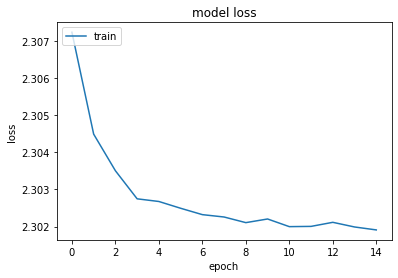

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

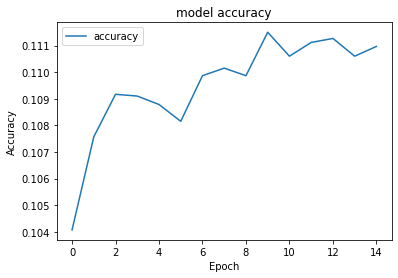

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 15

In [ ]:
#creat the model
model_15 = Sequential()

#conv layers

##first CNN layer
model_15.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_15.add(Activation("tanh"))

##second CNN layer
model_15.add(Conv2D(32,(2,2)))
model_15.add(Activation("tanh"))
model_15.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_15.add(Conv2D(64,(2,2)))
model_15.add(Activation("tanh"))
model_15.add(MaxPooling2D(pool_size=(2, 2)))

model_15.add(Flatten())

#FC layers

##first FC layer
model_15.add(Dense(64))
model_15.add(Activation("tanh"))

##second FC layer
model_15.add(Dense(32))
model_15.add(Activation("tanh"))

# softmax classifier
model_15.add(Dense(10))
model_15.add(Activation("softmax"))

model_15.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_110 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_255 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_111 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_256 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_112 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_15.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_15.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.2399 - accuracy: 0.9310
Epoch 2/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0743 - accuracy: 0.9782
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0489 - accuracy: 0.9858
Epoch 4/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0351 - accuracy: 0.9898
Epoch 5/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0250 - accuracy: 0.9930
Epoch 6/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0188 - accuracy: 0.9947
Epoch 7/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0147 - accuracy: 0.9959
Epoch 8/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0109 - accuracy: 0.9974
Epoch 9/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0074 - accuracy: 0.9985
Epoch 10/15
3000/3000 [==============================] - 17s 6ms/step - l

In [ ]:
loss, acc =model_15.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9895
loss = 0.035877808928489685
accuracy = 0.9894999861717224


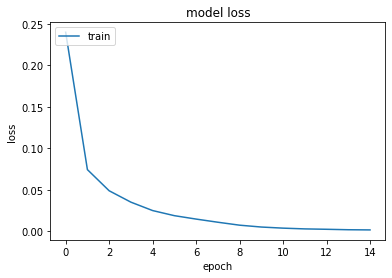

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

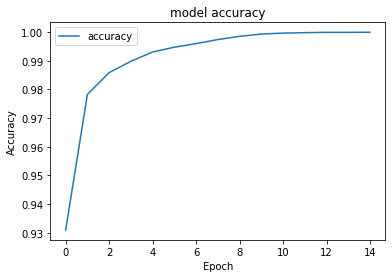

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 16

In [ ]:
#creat the model
model_16 = Sequential()

#conv layers

##first CNN layer
model_16.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_16.add(Activation("softsign"))

##second CNN layer
model_16.add(Conv2D(32,(2,2)))
model_16.add(Activation("softsign"))
model_16.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_16.add(Conv2D(64,(2,2)))
model_16.add(Activation("softsign"))
model_16.add(MaxPooling2D(pool_size=(2, 2)))

model_16.add(Flatten())

#FC layers

##first FC layer
model_16.add(Dense(64))
model_16.add(Activation("softsign"))

##second FC layer
model_16.add(Dense(32))
model_16.add(Activation("softsign"))

# softmax classifier
model_16.add(Dense(10))
model_16.add(Activation("softmax"))

model_16.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_261 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_114 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_262 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_16.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.3944 - accuracy: 0.8953
Epoch 2/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1191 - accuracy: 0.9649
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0785 - accuracy: 0.9771
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0590 - accuracy: 0.9830
Epoch 5/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0453 - accuracy: 0.9869
Epoch 6/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0369 - accuracy: 0.9893
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0314 - accuracy: 0.9908
Epoch 8/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0255 - accuracy: 0.9927
Epoch 9/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0213 - accuracy: 0.9943
Epoch 10/15
3000/3000 [==============================] - 18s 6ms/step - l

In [ ]:
loss, acc =model_16.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0378 - accuracy: 0.9894
loss = 0.03784416243433952
accuracy = 0.9894000291824341


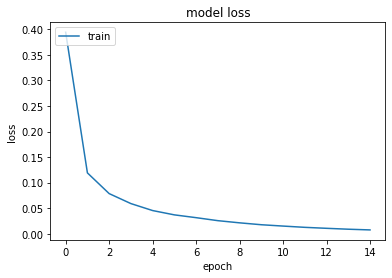

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

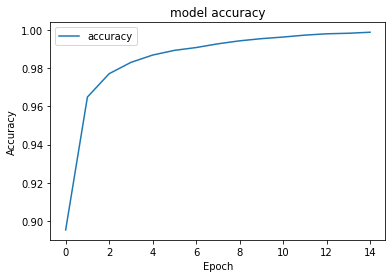

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 17

In [ ]:
#creat the model
model_17 = Sequential()

#conv layers

##first CNN layer
model_17.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_17.add(Activation("tanh"))

##second CNN layer
model_17.add(Conv2D(32,(2,2)))
model_17.add(Activation("tanh"))
model_17.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_17.add(Conv2D(64,(2,2)))
model_17.add(Activation("tanh"))
model_17.add(MaxPooling2D(pool_size=(2, 2)))

model_17.add(Flatten())

#FC layers

##first FC layer
model_17.add(Dense(64))
model_17.add(Activation("tanh"))

##second FC layer
model_17.add(Dense(32))
model_17.add(Activation("tanh"))

# softmax classifier
model_17.add(Dense(10))
model_17.add(Activation("softmax"))

model_17.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_267 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_117 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_268 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_118 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_17.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_17.fit(train_images,train_labels,epochs=12,batch_size=20)

Epoch 1/12
3000/3000 [==============================] - 18s 6ms/step - loss: 0.2403 - accuracy: 0.9308
Epoch 2/12
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0730 - accuracy: 0.9784
Epoch 3/12
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0473 - accuracy: 0.9863
Epoch 4/12
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0342 - accuracy: 0.9899
Epoch 5/12
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0262 - accuracy: 0.9918
Epoch 6/12
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0194 - accuracy: 0.9945
Epoch 7/12
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0134 - accuracy: 0.9966
Epoch 8/12
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0097 - accuracy: 0.9980
Epoch 9/12
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0073 - accuracy: 0.9987
Epoch 10/12
3000/3000 [==============================] - 17s 6ms/step - l

In [ ]:
loss, acc =model_17.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9891
loss = 0.03750592842698097
accuracy = 0.9890999794006348


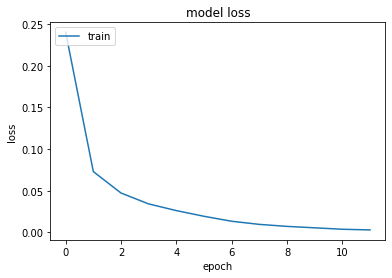

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

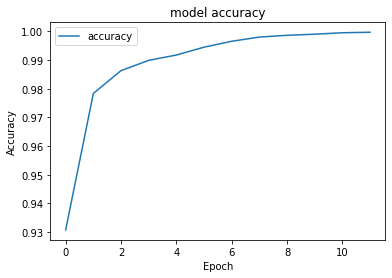

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 18

In [ ]:
#creat the model
model_18 = Sequential()

#conv layers

##first CNN layer
model_18.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_18.add(Activation("tanh"))

##second CNN layer
model_18.add(Conv2D(32,(2,2)))
model_18.add(Activation("tanh"))
model_18.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_18.add(Conv2D(64,(2,2)))
model_18.add(Activation("tanh"))
model_18.add(MaxPooling2D(pool_size=(2, 2)))

model_18.add(Flatten())

#FC layers

##first FC layer
model_18.add(Dense(64))
model_18.add(Activation("tanh"))

##second FC layer
model_18.add(Dense(32))
model_18.add(Activation("tanh"))

# softmax classifier
model_18.add(Dense(10))
model_18.add(Activation("softmax"))

model_18.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_119 (Conv2D)         (None, 27, 27, 16)        80        
                                                                 
 activation_273 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_120 (Conv2D)         (None, 26, 26, 32)        2080      
                                                                 
 activation_274 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_18.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model_18.fit(train_images,train_labels,epochs=12,batch_size=20)

NameError: ignored

In [ ]:
loss, acc =model_18.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 19

In [ ]:
#creat the model
model_19 = Sequential()

#conv layers

##first CNN layer
model_19.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_19.add(Activation("tanh"))

##second CNN layer
model_19.add(Conv2D(32,(2,2)))
model_19.add(Activation("tanh"))
model_19.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_19.add(Conv2D(64,(2,2)))
model_19.add(Activation("tanh"))
model_19.add(MaxPooling2D(pool_size=(2, 2)))

model_19.add(Flatten())

#FC layers

##first FC layer
model_19.add(Dense(64))
model_19.add(Activation("tanh"))

##second FC layer
model_19.add(Dense(32))
model_19.add(Activation("tanh"))

# softmax classifier
model_19.add(Dense(10))
model_19.add(Activation("softmax"))

model_19.summary()

In [ ]:
model_19.compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=['accuracy'])
history = model_19.fit(train_images,train_labels,epochs=12,batch_size=20)

In [ ]:
loss, acc =model_19.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 20

In [ ]:
#creat the model
model_20 = Sequential()

#conv layers

##first CNN layer
model_20.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_20.add(Activation("tanh"))

##second CNN layer
model_20.add(Conv2D(32,(2,2)))
model_20.add(Activation("tanh"))
model_20.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_20.add(Conv2D(64,(2,2)))
model_20.add(Activation("tanh"))
model_20.add(MaxPooling2D(pool_size=(2, 2)))

model_20.add(Flatten())

#FC layers

##first FC layer
model_20.add(Dense(64))
model_20.add(Activation("tanh"))
model_20.add(Dropout(0.5))

##second FC layer
model_20.add(Dense(32))
model_20.add(Activation("tanh"))

# softmax classifier
model_20.add(Dense(10))
model_20.add(Activation("softmax"))

model_20.summary()

In [ ]:
model_20.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_20.fit(train_images,train_labels,epochs=12,batch_size=20)

In [ ]:
loss, acc =model_20.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 21

In [ ]:
#creat the model
model_21 = Sequential()

#conv layers

##first CNN layer
model_21.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_21.add(Activation("tanh"))

##second CNN layer
model_21.add(Conv2D(32,(2,2)))
model_21.add(Activation("tanh"))
model_21.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_21.add(Conv2D(64,(2,2)))
model_21.add(Activation("tanh"))
model_21.add(MaxPooling2D(pool_size=(2, 2)))

model_21.add(Flatten())

#FC layers

##first FC layer
model_21.add(Dense(64))
model_21.add(Activation("tanh"))

##second FC layer
model_21.add(Dense(32))
model_21.add(Activation("tanh"))
model_21.add(Dropout(0.5))

# softmax classifier
model_21.add(Dense(10))
model_21.add(Activation("softmax"))

model_21.summary()

In [ ]:
model_21.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_21.fit(train_images,train_labels,epochs=12,batch_size=20)

In [ ]:
loss, acc =model_21.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

In [ ]:
#creat the model
model_21 = Sequential()

#conv layers

##first CNN layer
model_21.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_21.add(Activation("tanh"))

##second CNN layer
model_21.add(Conv2D(32,(2,2)))
model_21.add(Activation("tanh"))
model_21.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_21.add(Conv2D(64,(2,2)))
model_21.add(Activation("tanh"))
model_21.add(MaxPooling2D(pool_size=(2, 2)))

model_21.add(Flatten())

#FC layers

##first FC layer
model_21.add(Dense(64))
model_21.add(Activation("tanh"))

##second FC layer
model_21.add(Dense(32))
model_21.add(Activation("tanh"))
model_21.add(Dropout(0.25))

# softmax classifier
model_21.add(Dense(10))
model_21.add(Activation("softmax"))

model_21.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_11 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_12 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        8256      
                                                      

In [ ]:
model_21.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_21.fit(train_images,train_labels,epochs=20,batch_size=20)

Epoch 1/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3550 - accuracy: 0.8970
Epoch 2/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1202 - accuracy: 0.9646
Epoch 3/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0810 - accuracy: 0.9764
Epoch 4/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0617 - accuracy: 0.9821
Epoch 5/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0489 - accuracy: 0.9860
Epoch 6/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0406 - accuracy: 0.9880
Epoch 7/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0322 - accuracy: 0.9908
Epoch 8/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0279 - accuracy: 0.9919
Epoch 9/20
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0235 - accuracy: 0.9933
Epoch 10/20
3000/3000 [==============================] - 10s 3ms/step - l

In [ ]:
loss, acc =model_21.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9895
loss = 0.03779760003089905
accuracy = 0.9894999861717224


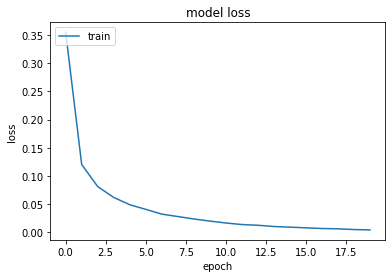

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

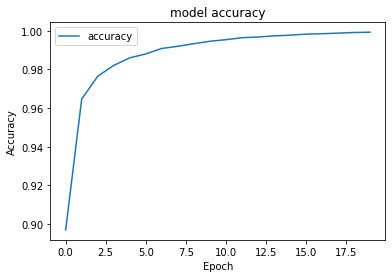

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)